<a href="https://colab.research.google.com/github/afnanrahman/EAFP/blob/OmerAndKevin/Kevin_Omer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages and Data

In [2]:
# Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Preprocessing
from sklearn.preprocessing import StandardScaler

In [3]:
data_df = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")
data_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,attrition,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,1,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,0,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,0,5754.33


# Finding Optimal K

Obvious, as we have only 2 categories, but here is the code if you want to take a look

In [4]:
# Fitting K-means on certain values
# Storing sum of sqaured distance of samples to centroids in distance
distance = []
values = range(1,10)
for k in values:
    k_means = KMeans(n_clusters=k)
    k_means.fit(data_df)
    distance.append(k_means.inertia_)

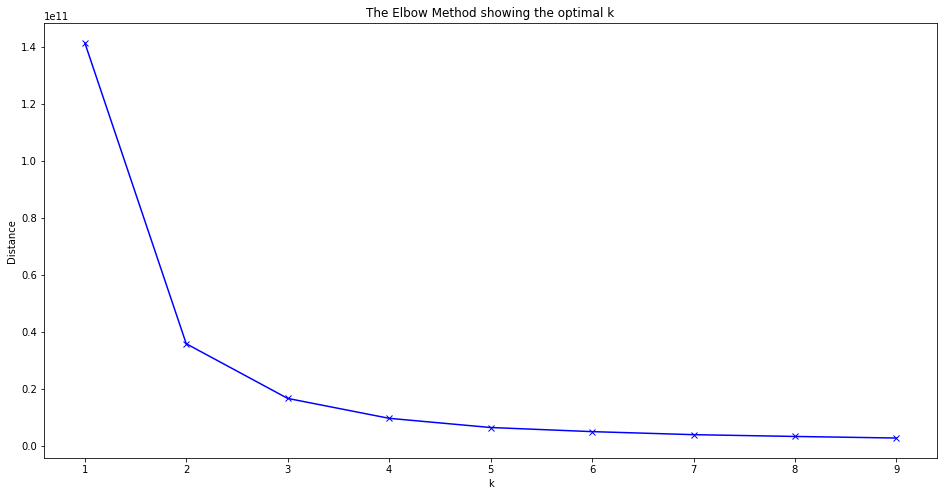

In [5]:
# Plotting Elbow Plot
plt.figure(figsize=(16,8))
plt.plot(values, distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Fitting 2-Means Model

In [6]:
k_means = KMeans(n_clusters=2)
k_means.fit(data_df)

KMeans(n_clusters=2)

**KMeans.inertia_** tells us the sum of the squared distance of samples to cluster centers, want to  **minimize** this number

In [7]:
k_means.inertia_

35885740721.52976

In [8]:
k_means.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 2,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
k_means.feature_names_in_

array(['age', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field',
       'employee_number', 'environment_satisfaction', 'gender',
       'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction',
       'stock_option_level', 'total_working_years',
       'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_with_curr_manager', 'attrition', 'rate_avg'], dtype=object)

# Improving Model

We only want to include features that maximizes our accuracies from our Sequential Forward/Backward Wrappers, so we drop the columns that don't help us

In [10]:
trimmed_data_df = data_df.drop(['daily_rate', 'department', 'education_field', 'gender',
       'hourly_rate', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike',
       'total_working_years', 'years_at_company', 'years_with_curr_manager',
       'attrition'], axis=1)
trimmed_data_df.head()

,age,business_travel,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_role,job_satisfaction,marital_status,over_time,performance_rating,relationship_satisfaction,stock_option_level,training_times_last_year,work_life_balance,years_in_current_role,rate_avg
0,41,2,1,2,1,2,3,2,7,4,2,1,3,1,0,0,1,4,6891.67
1,49,1,8,1,2,3,2,2,6,2,1,0,4,4,1,3,3,7,8415.67
2,37,2,2,2,4,4,2,1,2,3,2,1,3,2,0,3,3,0,1287.00
3,33,1,3,4,5,4,3,1,6,3,1,1,3,3,0,3,3,7,8202.33
4,27,2,2,1,7,1,3,1,2,2,1,0,3,4,1,3,3,2,5754.33


In [11]:
k_means_trimmed_features = KMeans(n_clusters=2)
k_means_trimmed_features.fit(trimmed_data_df)
k_means_trimmed_features.inertia_

4222577263.8277016

In [12]:
k_means.inertia_/k_means_trimmed_features.inertia_

8.498539749394636

The distance of the sum of the squared distance of samples to cluster centers is about 8.5 times less than the K-means done on all the features, which means that we are doing much better than before

# Comparing Predictions

In [13]:
kmean_pred = np.array(k_means_trimmed_features.predict(trimmed_data_df))
temp = np.unique(kmean_pred, return_counts=True)[1]
print("KMeans predicted {} non-attrition and {} attrition".format(temp[0], temp[1]))
print("Dataset contains {} non-attrition and {} attrition".format(data_df["attrition"].value_counts()[0], data_df["attrition"].value_counts()[1]))

KMeans predicted 1193 non-attrition and 1273 attrition
Dataset contains 1233 non-attrition and 1233 attrition


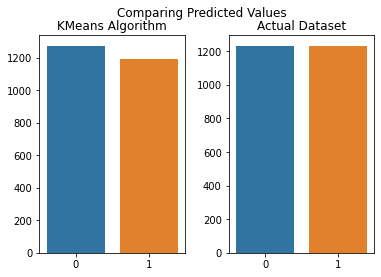

In [14]:
fig, axs = plt.subplots(1,2)
sns.barplot(data=pd.DataFrame(kmean_pred).value_counts(), ax=axs[0])
sns.barplot(data=pd.DataFrame(data_df['attrition']).value_counts(), ax=axs[1])
fig.suptitle("Comparing Predicted Values")
axs[0].set_title("KMeans Algorithm")
axs[1].set_title("Actual Dataset")
axs[1].set_xticklabels(axs[1].get_xticks(), rotation=0)
plt.subplots_adjust(wspace=0.3)
plt.show() 

# PCA Overview

In [15]:
# Standard Scalar
temp_df = data_df.drop(["attrition"], axis=1)
X_scale = StandardScaler().fit_transform(temp_df)

# PCA Instance
pca = PCA(n_components=19, random_state=42)
components = pca.fit_transform(X_scale)

In [16]:
# 30 features now reduced to 19
X_scale.shape

(2466, 30)

In [17]:
pca.explained_variance_

array([4.04998457, 2.06953426, 1.8077928 , 1.74394657, 1.65422059,
       1.42068108, 1.38101276, 1.1839122 , 1.13585587, 1.05478572,
       1.05099293, 0.98104648, 0.95852567, 0.94391293, 0.9282566 ,
       0.90975676, 0.85003758, 0.83046955, 0.81709054])

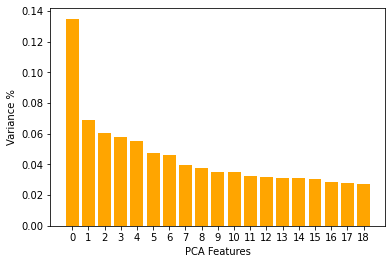

In [18]:
# Visualizing Top Predictors
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='orange')
plt.xlabel('PCA Features')
plt.ylabel('Variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(components)

In [19]:
kmeans = KMeans(2, random_state=42)
labels = kmeans.fit_predict(PCA_components)
print(labels)

[1 0 1 ... 1 1 1]


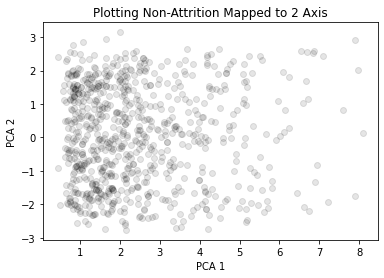

In [20]:
plt.scatter(PCA_components[labels==0][0], PCA_components[labels==0][1], alpha=.1, color='black')
plt.title("Plotting Non-Attrition Mapped to 2 Axis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

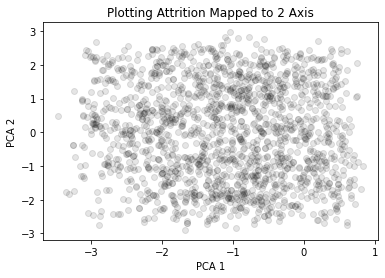

In [21]:
plt.scatter(PCA_components[labels==1][0], PCA_components[labels==1][1], alpha=.1, color='black')
plt.title("Plotting Attrition Mapped to 2 Axis")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

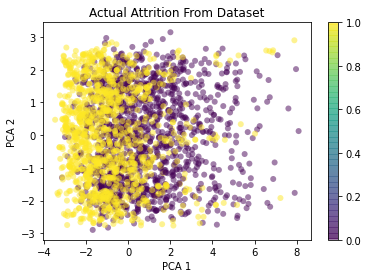

In [22]:
plt.scatter(PCA_components[0], PCA_components[1],
            c=data_df["attrition"], edgecolor='none', alpha=0.5,
            )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title("Actual Attrition From Dataset")
plt.colorbar();

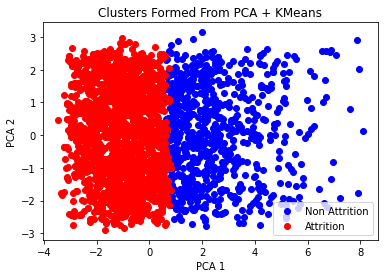

In [23]:
filtered_no_attrition = PCA_components[labels==0] 
filtered_attrition = PCA_components[labels==1]
plt.scatter(filtered_no_attrition[0], filtered_no_attrition[1], color="blue", label="Non Attrition")
plt.scatter(filtered_attrition[0], filtered_attrition[1], color="red", label="Attrition")
plt.title("Clusters Formed From PCA + KMeans")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

In [49]:
from sklearn import metrics
for i in range(2, 10):
  sc = SpectralClustering(n_clusters=i, eigen_solver="arpack", affinity="nearest_neighbors").fit_predict(trimmed_data_df)
  print(i, metrics.calinski_harabasz_score(trimmed_data_df, sc))

2 6075.341738795247
3 5667.361942068098
4 6003.491868533518
5 5799.418553430695
6 5209.194142234247
7 4856.055775065517
8 4600.788527203651
9 4538.046396191654


In [80]:
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering().fit_predict(trimmed_data_df)
#hierarchical clustering

In [81]:
from sklearn.cluster import MeanShift
mshift = MeanShift(bandwidth=2).fit_predict(trimmed_data_df)

In [85]:
sc = SpectralClustering(n_clusters=2, affinity="nearest_neighbors").fit_predict(trimmed_data_df)
#fit_predict for unsupervised models
print("kmeans:", metrics.calinski_harabasz_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.calinski_harabasz_score(trimmed_data_df, sc))
print("mean shift:", metrics.calinski_harabasz_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.calinski_harabasz_score(trimmed_data_df, agglomerative))
#https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c
#higher is better
#how well-defined each cluster is

kmeans: 6131.896799844337
spectral clustering: 6075.341738795247
mean shift: 7713573.418970081
agglomerative clustering: 4273.89823293521


In [86]:
print("kmeans:", metrics.davies_bouldin_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.davies_bouldin_score(trimmed_data_df, sc))
print("mean shift:", metrics.davies_bouldin_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.davies_bouldin_score(trimmed_data_df, agglomerative))
#relates distance between clusters and cluster size
#higher is better

kmeans: 0.5783244552623842
spectral clustering: 0.5780225586652061
mean shift: 0.0023708923947202217
agglomerative clustering: 0.5800646696125515


In [87]:
print("kmeans:", metrics.silhouette_score(trimmed_data_df, kmean_pred))
print("spectral clustering:", metrics.silhouette_score(trimmed_data_df, sc))
print("mean shift:", metrics.silhouette_score(trimmed_data_df, mshift))
print("agglomerative clustering:", metrics.silhouette_score(trimmed_data_df, agglomerative))
#higher is better

kmeans: 0.577220589972623
spectral clustering: 0.5765433292685305
mean shift: 0.006675512142006115
agglomerative clustering: 0.5205695764024323
